# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


## The basic idea is that the CNNs learn things in a hierarchical manner

Thus, if we have a great classifier that can classify 10k objects with 99% accuracy, it must have great primary layers that learn the basic features perfectly. 

So we can use the primary layers for other things, like classifying 11k objects !


## Let's talk about some pretrained models

- VGG16, VGG19 having 16 and 19 layers respectively 

- ResNet is larger than VGG, with different branches that learn something different; ResNet50, ResNet151, are variations

- Inception has multiple convolutions in parallel branches, different sizes of filters are tried and then their results are appended 


## Rule of Thumb

Computations take time, we must work around them. As a rule of thumb, if you're using data augmentation, put CNN computations inside the training loop.


In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import sys, os


In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 as pretrained, preprocess_input

## Let's import the dataset


In [4]:
!wget --passive-ftp --prefer-family=ipv4 https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz

--2020-06-04 13:09:44--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.16.131
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.16.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341553947 (326M) [application/x-tar]
Saving to: ‘imagenette2-320.tgz’

imagenette2-320.tgz 100%[===================>] 325.73M  15.8MB/s    in 22s     

2020-06-04 13:10:07 (14.7 MB/s) - ‘imagenette2-320.tgz’ saved [341553947/341553947]



In [5]:
!ls

imagenette2-320.tgz  sample_data


In [6]:
!tar -xzvf imagenette2-320.tgz

Streaming output truncated to the last 5000 lines.
imagenette2-320/train/n02102040/n02102040_1343.JPEG
imagenette2-320/train/n02102040/n02102040_487.JPEG
imagenette2-320/train/n02102040/n02102040_2516.JPEG
imagenette2-320/train/n02102040/n02102040_503.JPEG
imagenette2-320/train/n02102040/n02102040_2634.JPEG
imagenette2-320/train/n02102040/n02102040_5028.JPEG
imagenette2-320/train/n02102040/n02102040_5214.JPEG
imagenette2-320/train/n02102040/n02102040_3806.JPEG
imagenette2-320/train/n02102040/n02102040_467.JPEG
imagenette2-320/train/n02102040/n02102040_8208.JPEG
imagenette2-320/train/n02102040/n02102040_7124.JPEG
imagenette2-320/train/n02102040/n02102040_213.JPEG
imagenette2-320/train/n02102040/n02102040_35.JPEG
imagenette2-320/train/n02102040/n02102040_3997.JPEG
imagenette2-320/train/n02102040/n02102040_7617.JPEG
imagenette2-320/train/n02102040/n02102040_3699.JPEG
imagenette2-320/train/n02102040/n02102040_5136.JPEG
imagenette2-320/train/n02102040/n02102040_3593.JPEG
imagenette2-320/tra

In [7]:
!ls imagenette2-320/train

n01440764  n02979186  n03028079  n03417042  n03445777
n02102040  n03000684  n03394916  n03425413  n03888257


In [8]:
!ls imagenette2-320/val

n01440764  n02979186  n03028079  n03417042  n03445777
n02102040  n03000684  n03394916  n03425413  n03888257


In [0]:
path = 'imagenette2-320/train'
path_val = 'imagenette2-320/val'

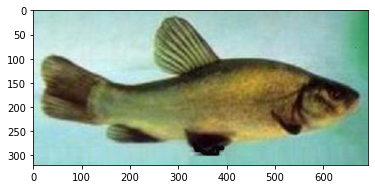

In [10]:
plt.imshow(image.load_img(path + '/n01440764/n01440764_1514.JPEG'))
plt.show()

In [0]:
IMAGE_SIZE = [200,200]
train_images = glob(path + '/*/*.JPEG')
validation_images = glob(path_val + '/*/*.JPEG')

In [0]:
# Number of classes 
classes = glob(path + '/*')

In [13]:
classes

['imagenette2-320/train/n03417042',
 'imagenette2-320/train/n01440764',
 'imagenette2-320/train/n03394916',
 'imagenette2-320/train/n02102040',
 'imagenette2-320/train/n03445777',
 'imagenette2-320/train/n03000684',
 'imagenette2-320/train/n03888257',
 'imagenette2-320/train/n02979186',
 'imagenette2-320/train/n03425413',
 'imagenette2-320/train/n03028079']

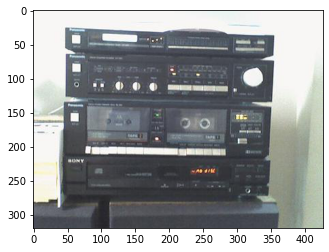

In [14]:
plt.imshow(image.load_img(np.random.choice(train_images)))
plt.show()

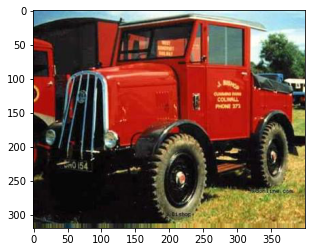

In [15]:
plt.imshow(image.load_img(np.random.choice(validation_images)))
plt.show()

In [16]:
C = 3
pretrained_model = pretrained(input_shape = IMAGE_SIZE + [C],
                              weights = 'imagenet',
                              include_top = False)
pretrained_model.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
Y = len(classes)
h_layer = Flatten()(pretrained_model.output)
o_layer = Dense(Y, activation= 'softmax')(h_layer)

In [0]:
model = Model(pretrained_model.input, o_layer)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
gen_object = ImageDataGenerator(rotation_range = 10,
                                width_shift_range = 0.1, 
                                height_shift_range = 0.1, 
                                zoom_range = 0.2,
                                horizontal_flip = True,
                                preprocessing_function = preprocess_input)

In [21]:
len(train_images)

9469

In [0]:
batch_size = 254

In [23]:
train_generator = gen_object.flow_from_directory(path, shuffle=True, target_size=IMAGE_SIZE, batch_size=batch_size)
validation_generator = gen_object.flow_from_directory(path_val, target_size=IMAGE_SIZE, batch_size=batch_size)

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [0]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [25]:
report = model.fit_generator(train_generator, 
                             validation_data=validation_generator, 
                             epochs=10,
                             steps_per_epoch = int(np.ceil(len(train_images)/batch_size)),
                             validation_steps = int(np.ceil(len(validation_images)/batch_size)))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
38/38 [==============================] - 149s 4s/step - loss: 2.9906 - accuracy: 0.8148 - val_loss: 0.4788 - val_accuracy: 0.9496
Epoch 2/10
38/38 [==============================] - 152s 4s/step - loss: 0.2700 - accuracy: 0.9648 - val_loss: 0.2542 - val_accuracy: 0.9623
Epoch 3/10
38/38 [==============================] - 152s 4s/step - loss: 0.1924 - accuracy: 0.9726 - val_loss: 0.3806 - val_accuracy: 0.9544
Epoch 4/10
38/38 [==============================] - 155s 4s/step - loss: 0.2172 - accuracy: 0.9686 - val_loss: 0.3363 - val_accuracy: 0.9564
Epoch 5/10
38/38 [==============================] - 151s 4s/step - loss: 0.1638 - accuracy: 0.9745 - val_loss: 0.2713 - val_accuracy: 0.9600
Epoch 6/10
38/38 [==============================] - 150s 4s/step - loss: 0.1393 - accuracy: 0.9749 - val_loss: 0.2938 - val_accuracy: 0.9562
Epoch 7/10
38/38 [==============================] - 150s 4s/step - loss: 0.151

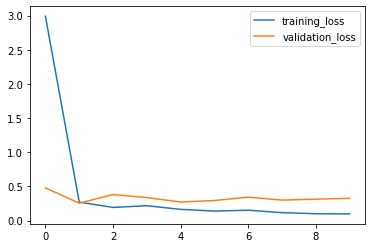

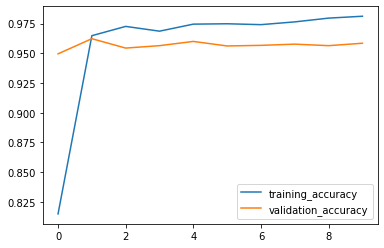

In [26]:
  plt.plot(report.history['loss'], label = 'training_loss')
  plt.plot(report.history['val_loss'], label = 'validation_loss')
  plt.legend()
  plt.show()
  plt.plot(report.history['accuracy'], label = 'training_accuracy')
  plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
  plt.legend()
  plt.show()